# Project: America's Right to Bare Arms 
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The United States of America has long been the country of the Second amendment. The second amendment being the individual right to keep and bear arms. In this report, the data you will see presented and findings will be based off of data from the U.S. Census in 2016 and National Instant Criminal Background Check System (NICS) data from 1998-2017. However, we will only be looking at data from 2016 for both data sets. We will see some questions answered about if in 2016, do states with higher populations have a larger amount of guns per person or is it the more rural states? What is the percentage of handguns per state in 2016? Is there a higher amount of permits per person in higher populated states? What state has the highest amount of permits?

In [343]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

First we will need to read the csv files into the notebook and make them into data frames.

In [344]:
df_gun = pd.read_csv('gun-data.csv')
df_us_cen = pd.read_csv('u.s.-census-data.csv')
df_gun.head(7)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506
5,2017-09,Colorado,4356.0,0.0,15751.0,13448.0,1007.0,1062,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35873
6,2017-09,Connecticut,4343.0,673.0,4834.0,1993.0,274.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12117


After reviewing the columns in df_gun, there are a few columns we will not need such as anything to do with pawning of a gun or the returning of a gun to an owner from the NICS.So we will need o drop all of these.

In [345]:
df_gun.drop(['permit_recheck','admin', 'prepawn_handgun', 'prepawn_long_gun', 'prepawn_other', 'redemption_handgun', 'redemption_long_gun', 'redemption_other', 'returned_handgun', 'returned_long_gun', 'returned_other', 'rentals_handgun','rentals_long_gun', 'return_to_seller_handgun', 'return_to_seller_long_gun','return_to_seller_other'], axis=1, inplace=True)


In [346]:
df_gun.tail(150)

,month,state,permit,handgun,long_gun,other,multiple,private_sale_handgun,private_sale_long_gun,private_sale_other,totals
12335,1999-01,Indiana,0.0,2552.0,12777.0,NaN,8,NaN,NaN,NaN,15337
12336,1999-01,Iowa,5553.0,49.0,2538.0,NaN,5,NaN,NaN,NaN,8162
12337,1999-01,Kansas,0.0,2854.0,5002.0,NaN,167,NaN,NaN,NaN,8023
12338,1999-01,Kentucky,0.0,7938.0,9634.0,NaN,337,NaN,NaN,NaN,17909
12339,1999-01,Louisiana,0.0,5506.0,7174.0,NaN,169,NaN,NaN,NaN,12849
...,...,...,...,...,...,...,...,...,...,...,...
12480,1998-11,Virginia,0.0,14.0,2.0,NaN,8,NaN,NaN,NaN,24
12481,1998-11,Washington,1.0,65.0,286.0,NaN,8,NaN,NaN,NaN,361
12482,1998-11,West Virginia,3.0,149.0,251.0,NaN,5,NaN,NaN,NaN,408
12483,1998-11,Wisconsin,0.0,25.0,214.0,NaN,2,NaN,NaN,NaN,241


We will need remove all data from the df_gun that is not in the time span of 2016. However, we will need to change the date of month to year for this. All analysis will be on a year scale.

In [347]:
df_gun['month'] = pd.DatetimeIndex(df_gun['month']).year
df_gun.head()

,month,state,permit,handgun,long_gun,other,multiple,private_sale_handgun,private_sale_long_gun,private_sale_other,totals
0,2017,Alabama,16717.0,5734.0,6320.0,221.0,317,9.0,16.0,3.0,32019
1,2017,Alaska,209.0,2320.0,2930.0,219.0,160,17.0,24.0,1.0,6303
2,2017,Arizona,5069.0,11063.0,7946.0,920.0,631,38.0,12.0,2.0,28394
3,2017,Arkansas,2935.0,4347.0,6063.0,165.0,366,13.0,23.0,0.0,17747
4,2017,California,57839.0,37165.0,24581.0,2984.0,0,0.0,0.0,0.0,123506


Drop all years before 2016.

In [348]:
df_gun = df_gun.drop(df_gun[df_gun['month'] < 2016].index)
df_gun.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1155 entries, 0 to 1154
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   month                  1155 non-null   int64  
 1   state                  1155 non-null   object 
 2   permit                 1155 non-null   float64
 3   handgun                1155 non-null   float64
 4   long_gun               1155 non-null   float64
 5   other                  1155 non-null   float64
 6   multiple               1155 non-null   int64  
 7   private_sale_handgun   1155 non-null   float64
 8   private_sale_long_gun  1155 non-null   float64
 9   private_sale_other     1155 non-null   float64
 10  totals                 1155 non-null   int64  
dtypes: float64(7), int64(3), object(1)
memory usage: 108.3+ KB


Check to make sure it worked

In [349]:
df_gun.tail()

,month,state,permit,handgun,long_gun,other,multiple,private_sale_handgun,private_sale_long_gun,private_sale_other,totals
1150,2016,Virginia,524.0,27033.0,15699.0,922.0,0,0.0,0.0,0.0,44181
1151,2016,Washington,19688.0,20427.0,11355.0,2147.0,595,555.0,458.0,29.0,58050
1152,2016,West Virginia,3378.0,7419.0,5505.0,321.0,349,5.0,7.0,2.0,18985
1153,2016,Wisconsin,9496.0,17969.0,10756.0,937.0,42,6.0,5.0,0.0,39561
1154,2016,Wyoming,959.0,2181.0,1983.0,160.0,104,3.0,3.0,0.0,5676


Drop all 2017.

In [350]:
df_gun = df_gun.drop(df_gun[df_gun['month'] > 2016].index)
df_gun.head()

,month,state,permit,handgun,long_gun,other,multiple,private_sale_handgun,private_sale_long_gun,private_sale_other,totals
495,2016,Alabama,26996.0,13733.0,17519.0,376.0,533,2.0,2.0,1.0,62014
496,2016,Alaska,254.0,4087.0,3698.0,243.0,191,0.0,0.0,0.0,8786
497,2016,Arizona,8900.0,18024.0,13785.0,1180.0,703,2.0,2.0,0.0,44887
498,2016,Arkansas,3294.0,9192.0,13433.0,277.0,385,2.0,7.0,0.0,29926
499,2016,California,61808.0,63649.0,93224.0,77929.0,0,0.0,0.0,0.0,298161


Rename column month to year since we are analyzing based off of only 2016.

In [351]:
df_gun.rename(columns = {'month':'year'}, inplace=True)
df_gun.head()

,year,state,permit,handgun,long_gun,other,multiple,private_sale_handgun,private_sale_long_gun,private_sale_other,totals
495,2016,Alabama,26996.0,13733.0,17519.0,376.0,533,2.0,2.0,1.0,62014
496,2016,Alaska,254.0,4087.0,3698.0,243.0,191,0.0,0.0,0.0,8786
497,2016,Arizona,8900.0,18024.0,13785.0,1180.0,703,2.0,2.0,0.0,44887
498,2016,Arkansas,3294.0,9192.0,13433.0,277.0,385,2.0,7.0,0.0,29926
499,2016,California,61808.0,63649.0,93224.0,77929.0,0,0.0,0.0,0.0,298161


In [352]:
df_gun.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 660 entries, 495 to 1154
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   year                   660 non-null    int64  
 1   state                  660 non-null    object 
 2   permit                 660 non-null    float64
 3   handgun                660 non-null    float64
 4   long_gun               660 non-null    float64
 5   other                  660 non-null    float64
 6   multiple               660 non-null    int64  
 7   private_sale_handgun   660 non-null    float64
 8   private_sale_long_gun  660 non-null    float64
 9   private_sale_other     660 non-null    float64
 10  totals                 660 non-null    int64  
dtypes: float64(7), int64(3), object(1)
memory usage: 61.9+ KB


We will start looking at our other data set (US Census) to start cleaning. First, lets look at what we have and figure out what we wil need. 

In [353]:
df_us_cen.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,4863300,741894,6931071,2988248,39250017,5540545,3576452,952065,...,865454,6651194,27862596,3051217,624594,8411808,7288000,1831102,5778708,585501
1,"Population estimates base, April 1, 2010, (V2...",NaN,4780131,710249,6392301,2916025,37254522,5029324,3574114,897936,...,814195,6346298,25146100,2763888,625741,8001041,6724545,1853011,5687289,563767
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


Write down on pencil and paper which column has the population of 2016 and then in the notebook remove the fact columns. We will not use these for analysis and they will hinder the merging of data frames.

In [354]:
df_us_cen.drop(columns = ['Fact','Fact Note'], inplace=True)
df_us_cen.head()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,4863300,741894,6931071,2988248,39250017,5540545,3576452,952065,20612439,10310371,...,865454,6651194,27862596,3051217,624594,8411808,7288000,1831102,5778708,585501
1,4780131,710249,6392301,2916025,37254522,5029324,3574114,897936,18804592,9688680,...,814195,6346298,25146100,2763888,625741,8001041,6724545,1853011,5687289,563767
2,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,9.60%,6.40%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934","18,801,310","9,687,653",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,5.50%,6.40%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


Transposing the columns and rows so we can remove all unnecessary data.

In [355]:
df_us_cen = df_us_cen.transpose()
df_us_cen.head()

,0,1,2,3,4,5,6,7,8,9,...,75,76,77,78,79,80,81,82,83,84
Alabama,4863300,4780131,1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alaska,741894,710249,4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,7.70%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arizona,6931071,6392301,8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,13.80%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arkansas,2988248,2916025,2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,14.40%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
California,39250017,37254522,5.40%,"37,253,956",6.30%,6.80%,23.20%,25.00%,13.60%,11.40%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Drop all columns with NaN values.

In [356]:
df_us_cen.dropna(axis = 1, inplace= True)

In [357]:
df_us_cen.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
Alabama,4863300,4780131,1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,...,"374,153","203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33","""01"""
Alaska,741894,710249,4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,7.70%,...,"68,032","35,402","22,141","13,688","51,147","7,953","56,091",1.2,"570,640.95","""02"""
Arizona,6931071,6392301,8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,13.80%,...,"499,926","245,243","182,425","135,313","344,981","46,780","427,582",56.3,"113,594.08","""04"""
Arkansas,2988248,2916025,2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,14.40%,...,"231,959","123,158","75,962","35,982","189,029","25,915","192,988",56,"52,035.48","""05"""
California,39250017,37254522,5.40%,"37,253,956",6.30%,6.80%,23.20%,25.00%,13.60%,11.40%,...,"3,548,449","1,852,580","1,320,085","1,619,857","1,819,107","252,377","3,176,341",239.1,"155,779.22","""06"""


Drop all columns other than the populaiton for 2016 which is the first column.

In [358]:
cols =[1, 2, 3,4 ,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30, 31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64]
df_us_cen.drop(df_us_cen[cols], axis=1, inplace=True)

In [359]:
df_us_cen.head()

,0
Alabama,4863300
Alaska,741894
Arizona,6931071
Arkansas,2988248
California,39250017


Rename the column so we can later merge the population with the gun data frame.

In [360]:
df_us_cen.rename(columns={df_us_cen.columns[0]:'pop_2016'}, inplace=True)
df_us_cen.head()

,pop_2016
Alabama,4863300
Alaska,741894
Arizona,6931071
Arkansas,2988248
California,39250017


In [361]:
df_us_cen.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   pop_2016  50 non-null     object
dtypes: object(1)
memory usage: 800.0+ bytes


Convert object data to numeric values for later arithmetic.

In [362]:
df_us_cen = df_us_cen.apply(pd.to_numeric)

In [363]:
df_us_cen.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   pop_2016  50 non-null     int64
dtypes: int64(1)
memory usage: 800.0+ bytes


Lets add one column to the gun data frame that sums all of the gun types for a total gun quantity per state.

In [364]:
df_gun['total_guns'] = (df_gun["handgun"] + df_gun["long_gun"] + df_gun["other"] + df_gun["multiple"])
df_gun.tail(8)

,year,state,permit,handgun,long_gun,other,multiple,private_sale_handgun,private_sale_long_gun,private_sale_other,totals,total_guns
1147,2016,Utah,10485.0,4662.0,3654.0,326.0,174,0.0,0.0,0.0,19968,8816.0
1148,2016,Vermont,0.0,1863.0,1379.0,134.0,65,1.0,1.0,0.0,3451,3441.0
1149,2016,Virgin Islands,73.0,26.0,0.0,0.0,1,0.0,0.0,0.0,100,27.0
1150,2016,Virginia,524.0,27033.0,15699.0,922.0,0,0.0,0.0,0.0,44181,43654.0
1151,2016,Washington,19688.0,20427.0,11355.0,2147.0,595,555.0,458.0,29.0,58050,34524.0
1152,2016,West Virginia,3378.0,7419.0,5505.0,321.0,349,5.0,7.0,2.0,18985,13594.0
1153,2016,Wisconsin,9496.0,17969.0,10756.0,937.0,42,6.0,5.0,0.0,39561,29704.0
1154,2016,Wyoming,959.0,2181.0,1983.0,160.0,104,3.0,3.0,0.0,5676,4428.0


<a id='eda'></a>
## Exploratory Data Analysis

Getting gun totals for only 2016, we will first need to sum all states totals for guns. We will need to group by state and sum.

In [365]:
df_gun.tail()

,year,state,permit,handgun,long_gun,other,multiple,private_sale_handgun,private_sale_long_gun,private_sale_other,totals,total_guns
1150,2016,Virginia,524.0,27033.0,15699.0,922.0,0,0.0,0.0,0.0,44181,43654.0
1151,2016,Washington,19688.0,20427.0,11355.0,2147.0,595,555.0,458.0,29.0,58050,34524.0
1152,2016,West Virginia,3378.0,7419.0,5505.0,321.0,349,5.0,7.0,2.0,18985,13594.0
1153,2016,Wisconsin,9496.0,17969.0,10756.0,937.0,42,6.0,5.0,0.0,39561,29704.0
1154,2016,Wyoming,959.0,2181.0,1983.0,160.0,104,3.0,3.0,0.0,5676,4428.0


In [366]:
grouped = df_gun.groupby('state').sum()
grouped.tail()


,year,permit,handgun,long_gun,other,multiple,private_sale_handgun,private_sale_long_gun,private_sale_other,totals,total_guns
state,,,,,,,,,,,
Virginia,24192,9817.0,295963.0,209975.0,12547.0,0,0.0,0.0,0.0,528369,518485.0
Washington,24192,268274.0,214106.0,151029.0,23732.0,8028,6669.0,5472.0,382.0,713996,396895.0
West Virginia,24192,26806.0,92124.0,81105.0,3643.0,5283,75.0,61.0,8.0,242350,182155.0
Wisconsin,24192,199431.0,186300.0,159784.0,9867.0,523,56.0,68.0,7.0,561819,356474.0
Wyoming,24192,7938.0,22569.0,25815.0,1457.0,1295,9.0,21.0,2.0,63594,51136.0


We can now drop the year column since they are all in the year 2016.

In [367]:
grouped.drop(columns = ['year'], inplace=True)
grouped.head(9)

,permit,handgun,long_gun,other,multiple,private_sale_handgun,private_sale_long_gun,private_sale_other,totals,total_guns
state,,,,,,,,,,
Alabama,291039.0,153123.0,121963.0,6104.0,6545,72.0,65.0,4.0,616947,287735.0
Alaska,3121.0,37491.0,36887.0,2889.0,2316,39.0,66.0,1.0,87647,79583.0
Arizona,87771.0,166784.0,108988.0,13122.0,7908,76.0,56.0,11.0,416279,296802.0
Arkansas,55456.0,80244.0,82120.0,3059.0,4400,72.0,64.0,6.0,266014,169823.0
California,1036981.0,560355.0,554550.0,211707.0,0,0.0,0.0,0.0,2377167,1326612.0
Colorado,85087.0,242502.0,180026.0,15890.0,14293,0.0,0.0,0.0,540514,452711.0
Connecticut,148949.0,122375.0,43813.0,2445.0,0,0.0,2.0,0.0,317692,168633.0
Delaware,8440.0,25574.0,21746.0,1268.0,1034,590.0,195.0,32.0,59430,49622.0
District of Columbia,144.0,675.0,48.0,0.0,8,0.0,0.0,0.0,875,731.0


Plot a bar graph to see the total guns per state compared to one another in 2016.

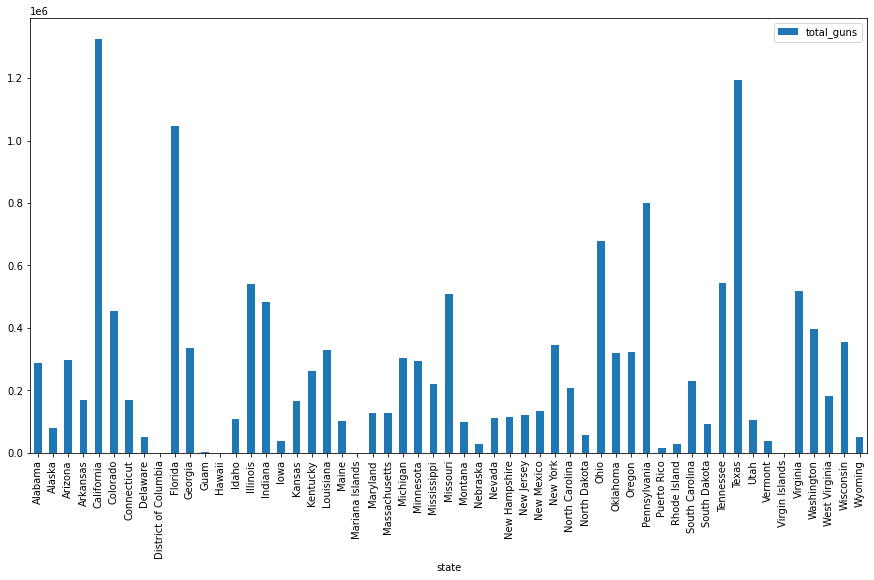

In [368]:
grouped.plot(y='total_guns', kind='bar', figsize=(15,8));

Now we need to merge the census data frame in with the gun data frame.

In [369]:
frames = [grouped, df_us_cen]
total_2016 = pd.concat(frames, axis=1, sort=True)
total_2016.head(15)

,permit,handgun,long_gun,other,multiple,private_sale_handgun,private_sale_long_gun,private_sale_other,totals,total_guns,pop_2016
Alabama,291039.0,153123.0,121963.0,6104.0,6545,72.0,65.0,4.0,616947,287735.0,4863300.0
Alaska,3121.0,37491.0,36887.0,2889.0,2316,39.0,66.0,1.0,87647,79583.0,741894.0
Arizona,87771.0,166784.0,108988.0,13122.0,7908,76.0,56.0,11.0,416279,296802.0,6931071.0
Arkansas,55456.0,80244.0,82120.0,3059.0,4400,72.0,64.0,6.0,266014,169823.0,2988248.0
California,1036981.0,560355.0,554550.0,211707.0,0,0.0,0.0,0.0,2377167,1326612.0,39250017.0
Colorado,85087.0,242502.0,180026.0,15890.0,14293,0.0,0.0,0.0,540514,452711.0,5540545.0
Connecticut,148949.0,122375.0,43813.0,2445.0,0,0.0,2.0,0.0,317692,168633.0,3576452.0
Delaware,8440.0,25574.0,21746.0,1268.0,1034,590.0,195.0,32.0,59430,49622.0,952065.0
District of Columbia,144.0,675.0,48.0,0.0,8,0.0,0.0,0.0,875,731.0,NaN
Florida,337086.0,662308.0,316232.0,42439.0,25142,369.0,143.0,4.0,1435340,1046121.0,20612439.0


We only want to look at the States of America, not any of the territories. Remove rows that have no values for population which are the territories.

In [370]:
total_2016.dropna(axis=0,inplace=True)
total_2016.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   permit                 50 non-null     float64
 1   handgun                50 non-null     float64
 2   long_gun               50 non-null     float64
 3   other                  50 non-null     float64
 4   multiple               50 non-null     int64  
 5   private_sale_handgun   50 non-null     float64
 6   private_sale_long_gun  50 non-null     float64
 7   private_sale_other     50 non-null     float64
 8   totals                 50 non-null     int64  
 9   total_guns             50 non-null     float64
 10  pop_2016               50 non-null     float64
dtypes: float64(9), int64(2)
memory usage: 4.7+ KB


Drop Hawaii since it has no data on total guns.

In [371]:
total_2016.drop(['Hawaii'], axis=0, inplace=True)
total_2016.head(15)

,permit,handgun,long_gun,other,multiple,private_sale_handgun,private_sale_long_gun,private_sale_other,totals,total_guns,pop_2016
Alabama,291039.0,153123.0,121963.0,6104.0,6545,72.0,65.0,4.0,616947,287735.0,4863300.0
Alaska,3121.0,37491.0,36887.0,2889.0,2316,39.0,66.0,1.0,87647,79583.0,741894.0
Arizona,87771.0,166784.0,108988.0,13122.0,7908,76.0,56.0,11.0,416279,296802.0,6931071.0
Arkansas,55456.0,80244.0,82120.0,3059.0,4400,72.0,64.0,6.0,266014,169823.0,2988248.0
California,1036981.0,560355.0,554550.0,211707.0,0,0.0,0.0,0.0,2377167,1326612.0,39250017.0
Colorado,85087.0,242502.0,180026.0,15890.0,14293,0.0,0.0,0.0,540514,452711.0,5540545.0
Connecticut,148949.0,122375.0,43813.0,2445.0,0,0.0,2.0,0.0,317692,168633.0,3576452.0
Delaware,8440.0,25574.0,21746.0,1268.0,1034,590.0,195.0,32.0,59430,49622.0,952065.0
Florida,337086.0,662308.0,316232.0,42439.0,25142,369.0,143.0,4.0,1435340,1046121.0,20612439.0
Georgia,233115.0,194800.0,128277.0,6474.0,7478,53.0,53.0,11.0,612985,337029.0,10310371.0


Find out how many guns there are per person for each state.

In [372]:
total_2016['guns_per_person'] = (total_2016['total_guns']/total_2016['pop_2016'])
total_2016.head()

,permit,handgun,long_gun,other,multiple,private_sale_handgun,private_sale_long_gun,private_sale_other,totals,total_guns,pop_2016,guns_per_person
Alabama,291039.0,153123.0,121963.0,6104.0,6545,72.0,65.0,4.0,616947,287735.0,4863300.0,0.059165
Alaska,3121.0,37491.0,36887.0,2889.0,2316,39.0,66.0,1.0,87647,79583.0,741894.0,0.107270
Arizona,87771.0,166784.0,108988.0,13122.0,7908,76.0,56.0,11.0,416279,296802.0,6931071.0,0.042822
Arkansas,55456.0,80244.0,82120.0,3059.0,4400,72.0,64.0,6.0,266014,169823.0,2988248.0,0.056830
California,1036981.0,560355.0,554550.0,211707.0,0,0.0,0.0,0.0,2377167,1326612.0,39250017.0,0.033799


### Is there more guns per person in less populated states?

Below you will see the amount of guns in each state in one graph and the population by state in the other.

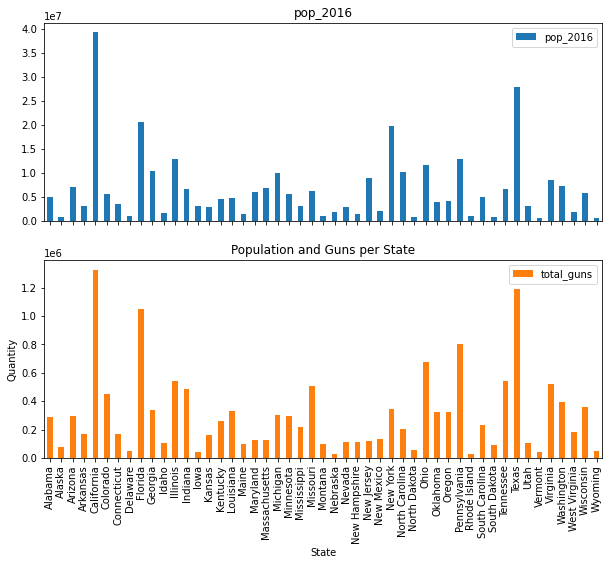

In [383]:
total_2016.plot(y=["pop_2016", "total_guns"], kind="bar", figsize=(10,8), subplots=True)
plt.title("Population and Guns per State")
plt.xlabel("State")
plt.ylabel("Quantity");

Now we will plot the guns per person to see if states with higher populations and total guns have more guns per person.


### Do states with higher populations have more guns per person?

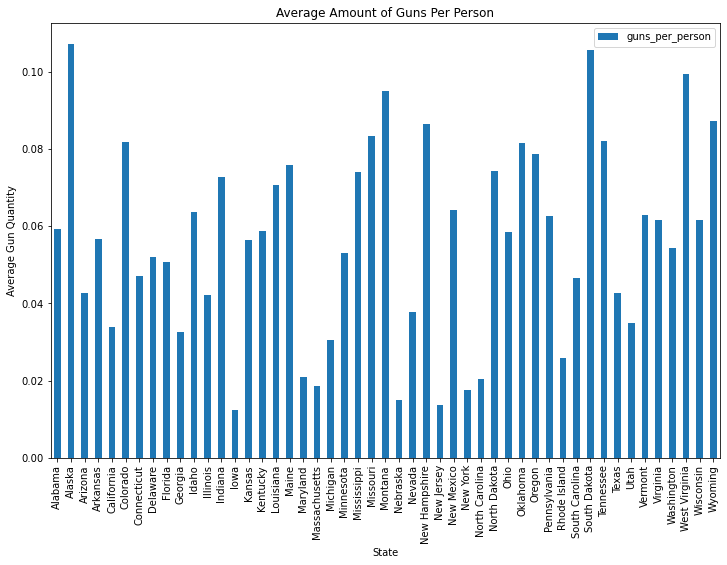

In [384]:
total_2016.plot(y=["guns_per_person"], kind="bar", figsize=(12,8))
plt.title('Average Amount of Guns Per Person')
plt.xlabel('State')
plt.ylabel('Average Gun Quantity');

Percentage break down of guns per person.

In [375]:
total_2016['guns_per_person'].describe()

count    49.000000
mean      0.056510
std       0.025167
min       0.012284
25%       0.037881
50%       0.058450
75%       0.074205
max       0.107270
Name: guns_per_person, dtype: float64

### What percentage of guns per state is handguns?

Find out the percentage of handguns from total guns for each state.

In [376]:
total_2016['handguns_per_state_perc'] = (100 * (total_2016['handgun']/total_2016['total_guns']))
total_2016['handguns_per_state'] = (total_2016['handgun']/total_2016['total_guns'])
total_2016.head()

,permit,handgun,long_gun,other,multiple,private_sale_handgun,private_sale_long_gun,private_sale_other,totals,total_guns,pop_2016,guns_per_person,handguns_per_state_perc,handguns_per_state
Alabama,291039.0,153123.0,121963.0,6104.0,6545,72.0,65.0,4.0,616947,287735.0,4863300.0,0.059165,53.216675,0.532167
Alaska,3121.0,37491.0,36887.0,2889.0,2316,39.0,66.0,1.0,87647,79583.0,741894.0,0.107270,47.109307,0.471093
Arizona,87771.0,166784.0,108988.0,13122.0,7908,76.0,56.0,11.0,416279,296802.0,6931071.0,0.042822,56.193691,0.561937
Arkansas,55456.0,80244.0,82120.0,3059.0,4400,72.0,64.0,6.0,266014,169823.0,2988248.0,0.056830,47.251550,0.472516
California,1036981.0,560355.0,554550.0,211707.0,0,0.0,0.0,0.0,2377167,1326612.0,39250017.0,0.033799,42.239555,0.422396


Plot the percetanges of handguns out of total guns per state.

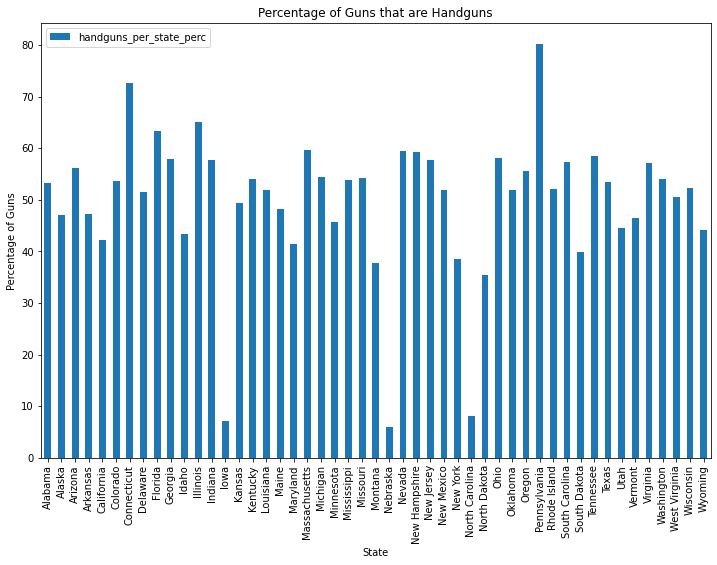

In [385]:
total_2016.plot(y=["handguns_per_state_perc"], kind="bar", figsize=(12,8))
plt.title('Percentage of Guns that are Handguns')
plt.xlabel('State')
plt.ylabel('Percentage of Guns');

#### Whats the average amount of handguns out of total guns per state?

In [378]:
total_2016['handguns_per_state'].describe()

count    49.000000
mean      0.498223
std       0.137883
min       0.060134
25%       0.457458
50%       0.522619
75%       0.573094
max       0.802166
Name: handguns_per_state, dtype: float64

### Is there a higher amount of permits per person in higher populated states?

Find out how many permits there are per person in each state.

In [379]:
total_2016['permits_per_person'] = (total_2016['permit']/total_2016['pop_2016'])
total_2016.head()

,permit,handgun,long_gun,other,multiple,private_sale_handgun,private_sale_long_gun,private_sale_other,totals,total_guns,pop_2016,guns_per_person,handguns_per_state_perc,handguns_per_state,permits_per_person
Alabama,291039.0,153123.0,121963.0,6104.0,6545,72.0,65.0,4.0,616947,287735.0,4863300.0,0.059165,53.216675,0.532167,0.059844
Alaska,3121.0,37491.0,36887.0,2889.0,2316,39.0,66.0,1.0,87647,79583.0,741894.0,0.107270,47.109307,0.471093,0.004207
Arizona,87771.0,166784.0,108988.0,13122.0,7908,76.0,56.0,11.0,416279,296802.0,6931071.0,0.042822,56.193691,0.561937,0.012663
Arkansas,55456.0,80244.0,82120.0,3059.0,4400,72.0,64.0,6.0,266014,169823.0,2988248.0,0.056830,47.251550,0.472516,0.018558
California,1036981.0,560355.0,554550.0,211707.0,0,0.0,0.0,0.0,2377167,1326612.0,39250017.0,0.033799,42.239555,0.422396,0.026420


We will use a scatter plot to see the relationship between population and permits. 

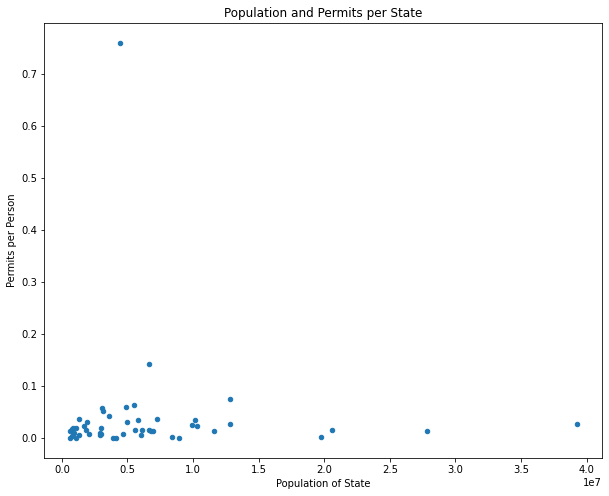

In [380]:
total_2016.plot(x='pop_2016',y="permits_per_person", kind="scatter", figsize=(10,8))
plt.title("Population and Permits per State")
plt.xlabel("Population of State")
plt.ylabel("Permits per Person");

### What state has the highest amount of permits per person?

In [381]:
total_2016[total_2016['permits_per_person']==total_2016['permits_per_person'].max()]

,permit,handgun,long_gun,other,multiple,private_sale_handgun,private_sale_long_gun,private_sale_other,totals,total_guns,pop_2016,guns_per_person,handguns_per_state_perc,handguns_per_state,permits_per_person
Kentucky,3372613.0,140721.0,109030.0,3886.0,6943,107.0,77.0,5.0,3676847,260580.0,4436974.0,0.058729,54.002993,0.54003,0.760116


Percentage breakdown of permits per state.

In [382]:
total_2016['permits_per_person'].describe()

count    49.000000
mean      0.038102
std       0.108208
min       0.000000
25%       0.007506
50%       0.015949
75%       0.030615
max       0.760116
Name: permits_per_person, dtype: float64

#### Limitations in the analysis.
We only looked at one year and so no interpretations are made extrapolating the data we looked at for 2016 to any other year. Each year could look drastically different. 

<a id='conclusions'></a>
### Conlusions

Less populated states (rural states) have more documented guns per person than higher populated states. The most amount of guns per person being Alaska with 0.107 guns per person with a populaiton around 750,000. While a state like California has a population of almost 40 million and only 0.037 guns per person.

The average amount of handguns per state is 49.8% with one state having 80% of its guns being handguns and one having 6% being handguns.

On average, the amount of permits per person for all states is 3.8%. However, one outlier, Kentucky, has 76% of its populaiton having gun permits. That seems to be well documented state. Although, our analysis is unable to specifically say if thats true. 